# Workflow

./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S001\S001R01.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S001\S001R02.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S002\S002R01.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S002\S002R02.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S003\S003R01.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S003\S003R02.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S004\S004R01.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S004\S004R02.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S005\S005R01.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S005\S005R02.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S006\S006R01.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S006\S006R02.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S007\S007R01.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S007\S007R02.edf
./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0\S008\S008R01.edf
./EEGData/MNE-eegbci-data/files/eegmmidb

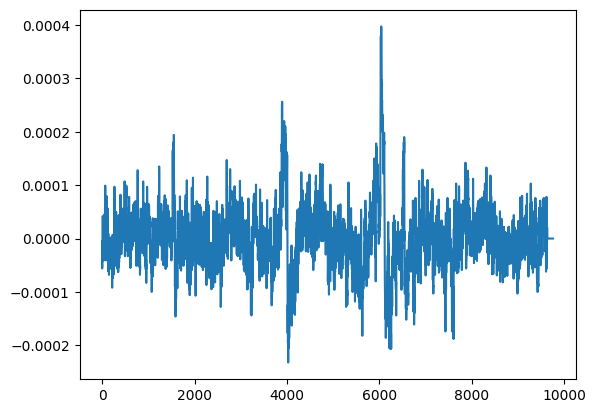

In [40]:
import mne
import numpy as np 
import matplotlib.pyplot as plt
import torch
import os
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

main_folder = './EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0'

subdirectories = [f.path for f in os.scandir(main_folder) if f.is_dir()]

opened_files = []
closed_files = []

for subdirectory in subdirectories:
    files = os.listdir(subdirectory)
    
    if len(files) > 0:
        for file in files:
            
            if file[-6:] == '01.edf':
                # This is data for eyes opened
                eyes_opened = os.path.join(subdirectory, file)
                print(eyes_opened)
                opened_files.append(eyes_opened)

            if file[-6:] == '02.edf':
                # This is data for eyes closed
                eyes_closed = os.path.join(subdirectory, file)
                print(eyes_closed)
                closed_files.append(eyes_closed)
    else:
        print(f"No files found in {subdirectory}")
        
        
large_open_data = []
# This is a list of all the data for eyes opened
large_closed_data = []
# This is a list of all the data for eyes closed

for data in opened_files:
    large_open_data.append(mne.io.read_raw_edf(data, preload=True, verbose=False).get_data(verbose=False))

for data in closed_files:
    large_closed_data.append(mne.io.read_raw_edf(data, preload=True, verbose=False).get_data(verbose=False))

# This is the number of files for eyes opened
print(large_open_data.__len__())
# This is the number of files for eyes closed
print(large_closed_data.__len__())


training_data = np.array(large_open_data[0:12])
plt.plot(training_data[0, 0, :])
plt.show()

Epoch 0: Critic error ([52926839.72963836]) Generator err ([-0.2916358709335327])


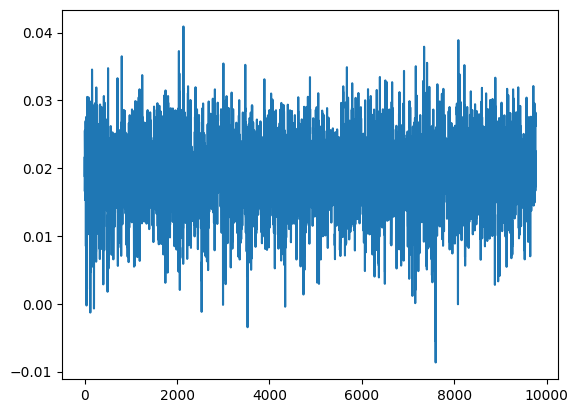

Epoch 10: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338]) Generator err ([-0.2916358709335327, -0.2946930527687073, -0.26540377736091614, -0.31707295775413513, -0.2979816794395447, -0.2933453619480133, -0.2952854335308075, -0.2838023006916046, -0.29199284315109253, -0.2940230667591095, -0.27795863151550293])


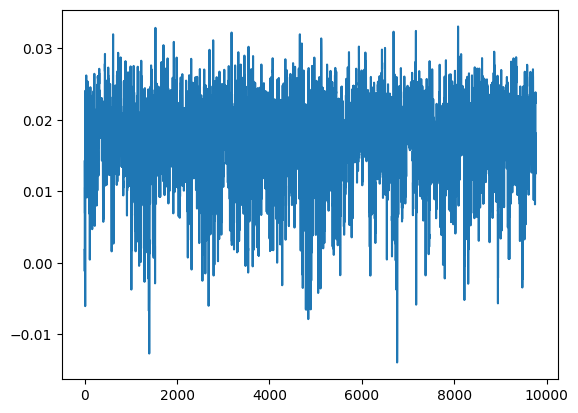

Epoch 20: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977]) Generator err ([-0.2916358709335327, -0.2946930527687073, -0.26540377736091614, -0.31707295775413513, -0.2979816794395447, -0.2933453619480133, -0.2952854335308075, -0.2838023006916046, -0.29199284315109253, -0.2940230667591095, -0.27795863151550293, -0.28291505575180054, -0.3098999261856079, -0.27474474906921387, -0.2979018986225128, -0.3045966327190399, -0.2946668863296509, -0.2943137586116791, -0.30117717385292053, -0.29441529512405396, -0.3009708523750305])


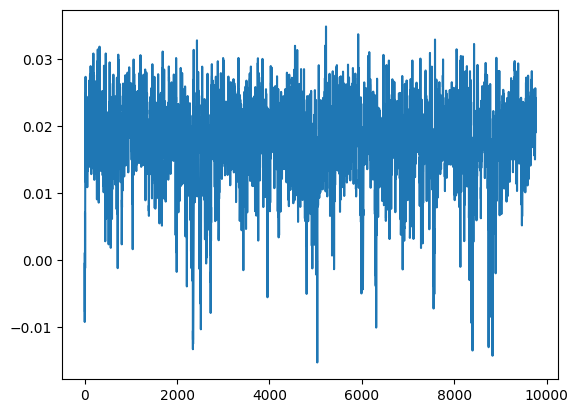

Epoch 30: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502]) Generator err ([-0.2916358709335327, -0.2946930527687073, -0.26540377736091614, -0.31707295775413513, -0.2979816794395447, -0.2933453619480133, -0.2952854335308075, -0.2838023006916046, -0.29199284315109253, -0.2940230667591095, -0.27795863151550293, -0.28291505575180054, -0.3098999261856079, -0.27474474906921387, -0.2979018986225128, -0.3045966327190399, -0.294666886329650

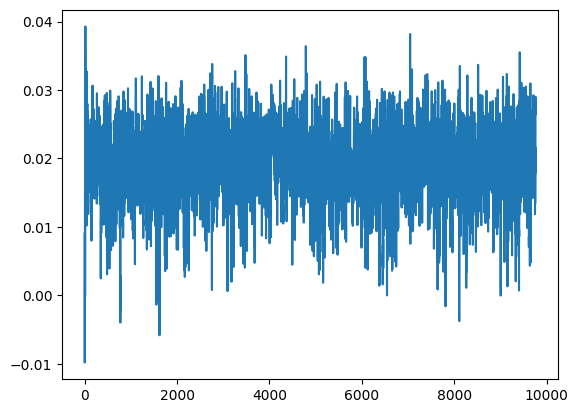

Epoch 40: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133]) Generator err ([-0.2916358709335327, -0.2946930527687073, -0.26540377736091614, -0.31707295775413513, -0.2979816794395447, -0.2933453619480133, -0.2952854335308075, -0.28380230069160

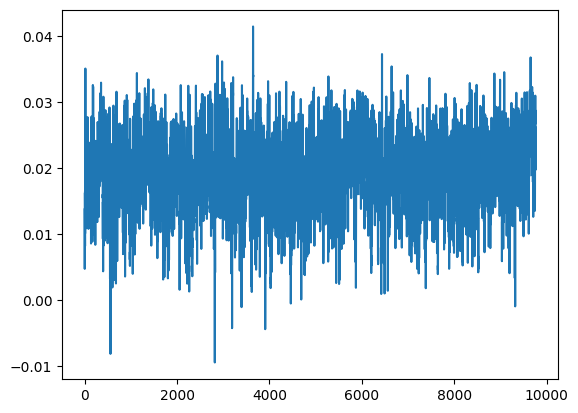

Epoch 50: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.4

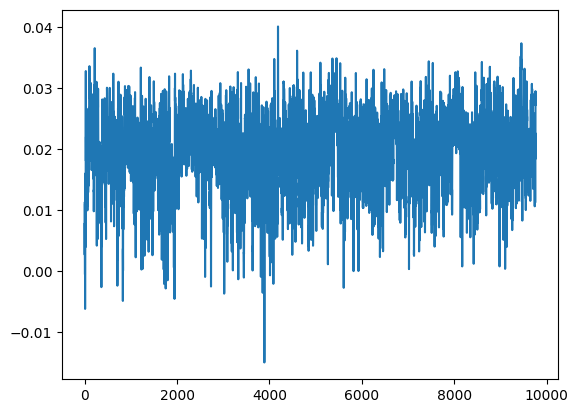

Epoch 60: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.4

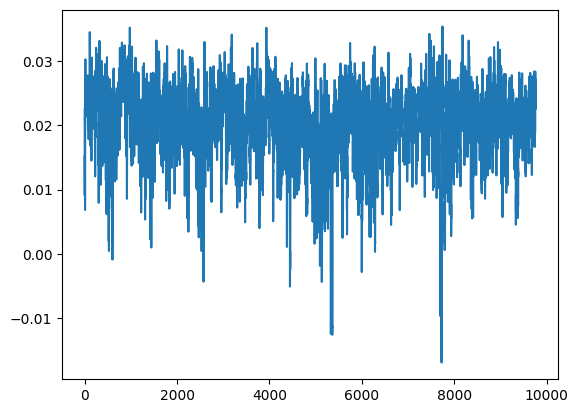

Epoch 70: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.4

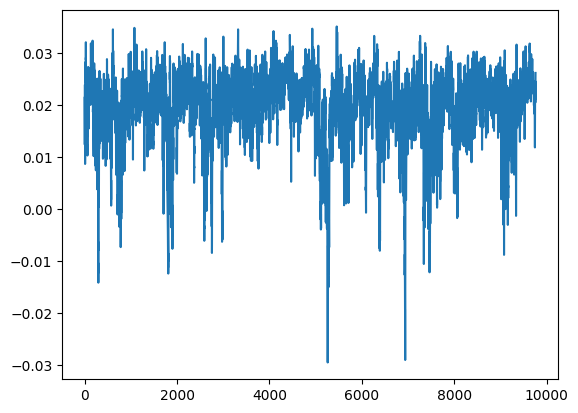

Epoch 80: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.4

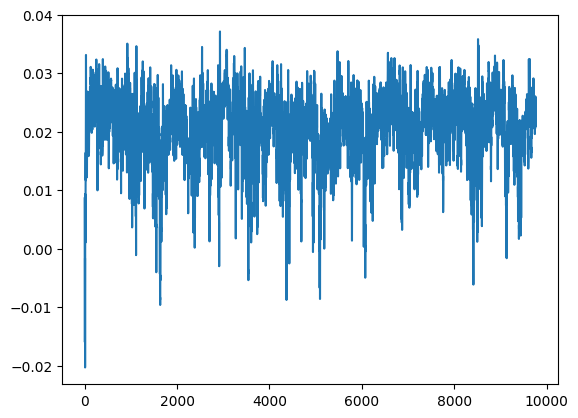

Epoch 90: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.4

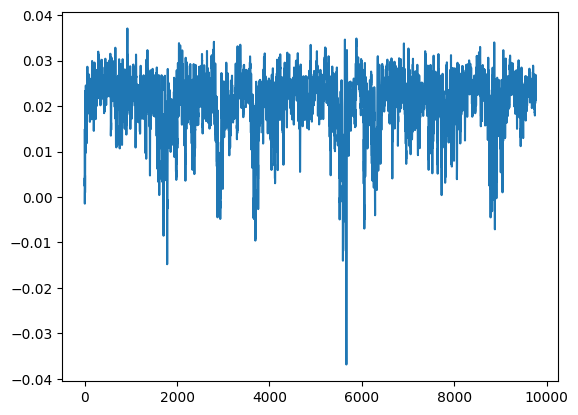

Epoch 100: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

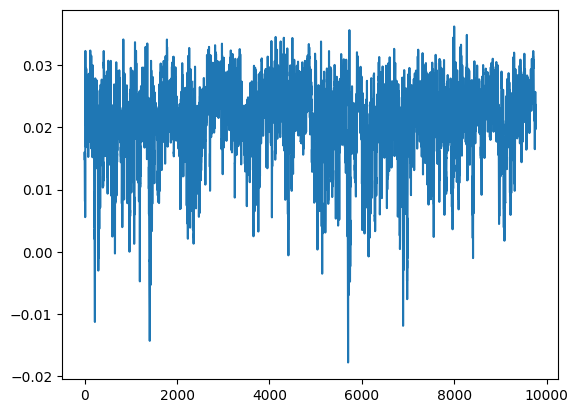

Epoch 110: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

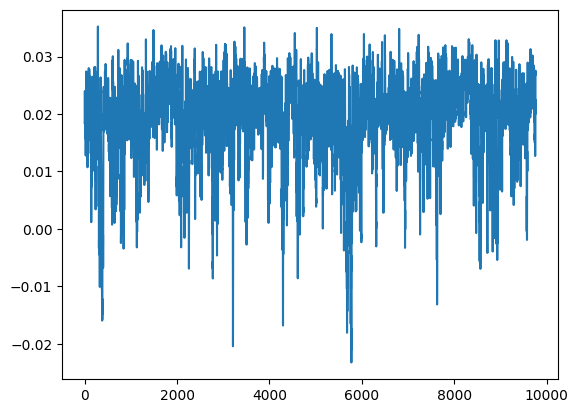

Epoch 120: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

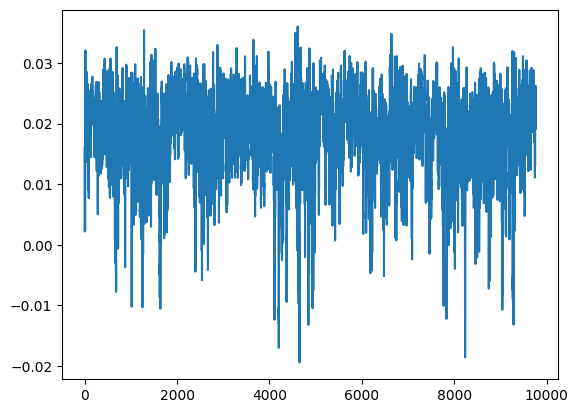

Epoch 130: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

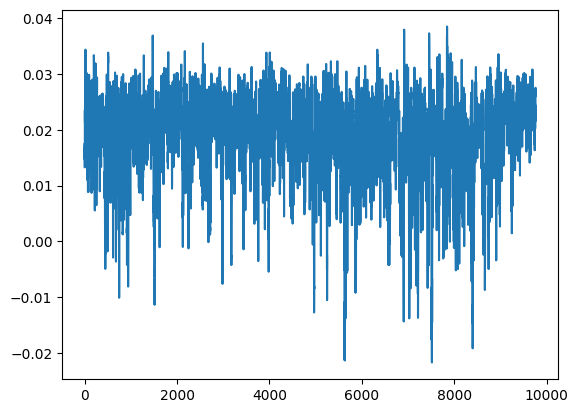

Epoch 140: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

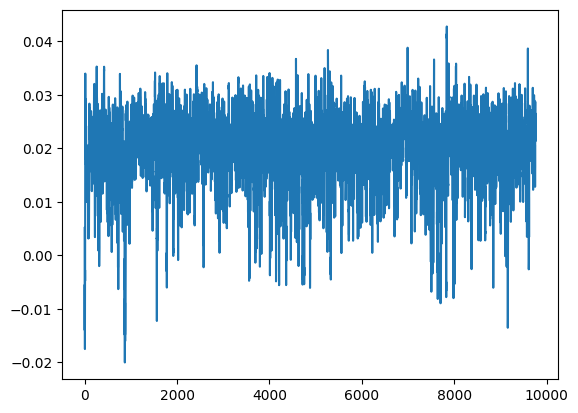

Epoch 150: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

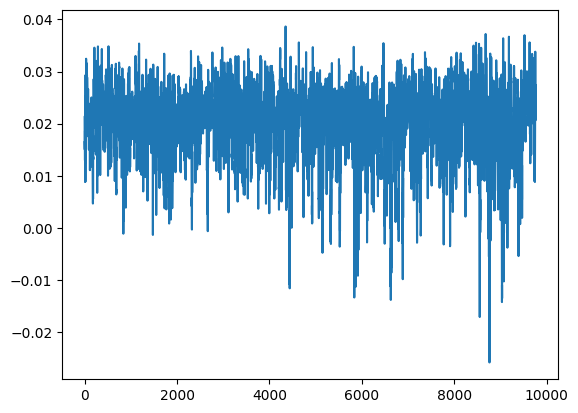

Epoch 160: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

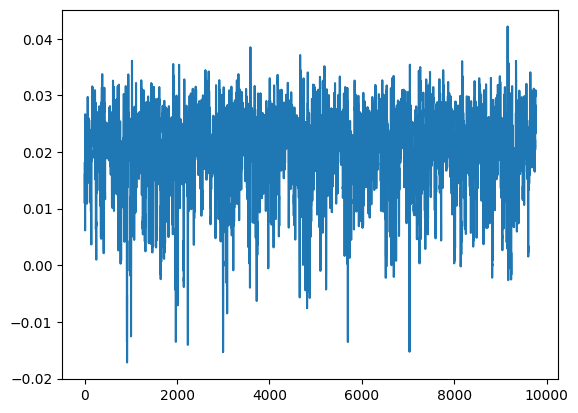

Epoch 170: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

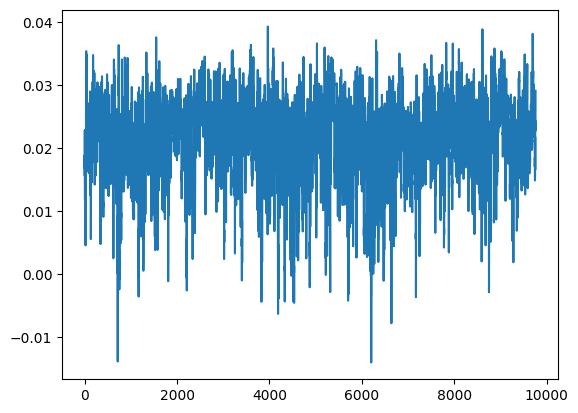

Epoch 180: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

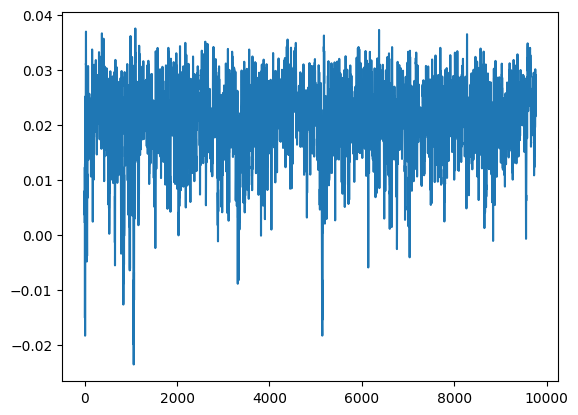

Epoch 190: Critic error ([52926839.72963836, 4193347.1872710744, 23225855.34806662, 17989549.65707891, 5474223.63478441, 45396851.01414114, 4617152.203880312, 48785272.41504642, 1047413.8148851588, 16760608.24696942, 20077874.986594338, 1557249.9478825172, 130454913.41692577, 10898003.978971604, 31947005.034211457, 839991738.4228958, 21659837.23983497, 44880957.05046956, 269884.5104776617, 312653.1120733657, 4143792.4156659977, 48227039.1118559, 9627679.317496432, 1986380.3976759508, 579610.5284578213, 13792925.413594421, 75889269.97499593, 301793.6217342261, 81710310.10218608, 1156091.2933473398, 6393820.337847502, 270188.70089712867, 608974.2921284549, 2058919.666376275, 28766127.484077625, 7252699.310706644, 4438612.743442463, 26625838.127841335, 5489012.515358042, 4888534.080287028, 1163432.4827079133, 146226.07073913916, 653517.4119854025, 117493332.33022992, 2641690.40311404, 6692249.0913079325, 6142127.54903955, 1140678.5394946588, 16082276.481124274, 3201627.5340239536, 473127.

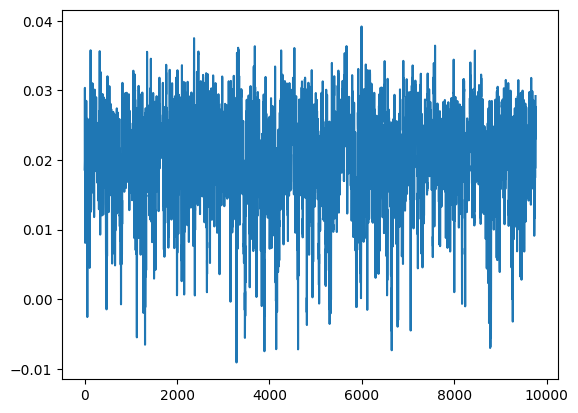

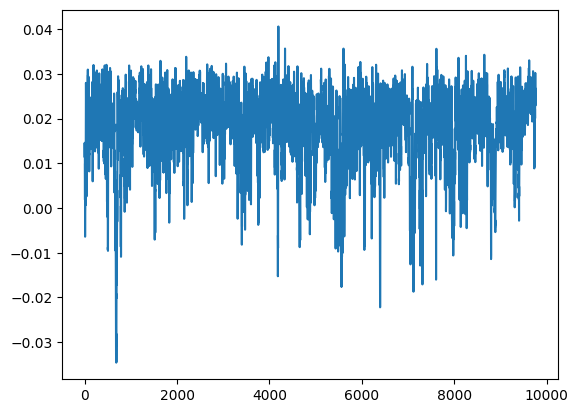

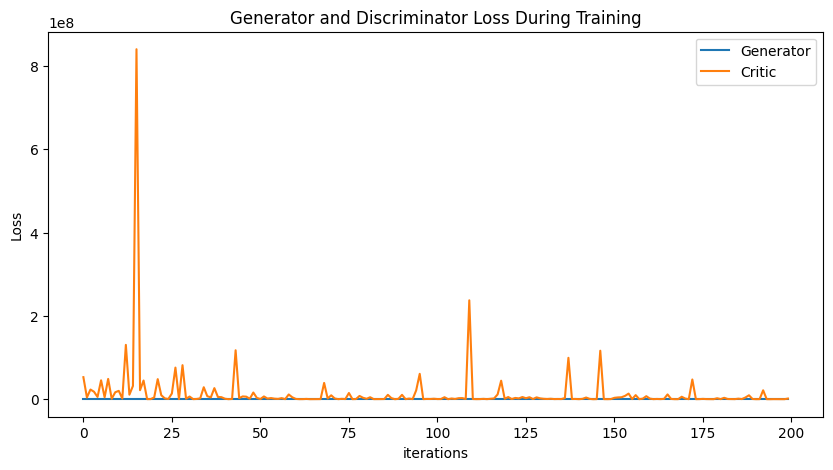

In [ ]:
# one that works with reasonable amount of layers


NUM_EPOCHS = 200
PRINT_INTERVAL = 10 # every 10 epoch, print status
BATCH_SIZE = 12
NUM_CHANNELS = 64
SEQUENCE_LENGTH = 9760
LAMBDA_GP = 10

training_data = np.array(large_open_data[0:12])
training_data = torch.tensor(training_data)


def weights_init(model):
    for m in model.modules():
      if isinstance(m, (nn.Conv1d, nn.ConvTranspose1d)):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
      elif isinstance(m, nn.BatchNorm1d):
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# Gaussian normal distribution
def sample_normal_distribution(i, j, k):
    mu = 0
    sigma = 1
    return torch.Tensor(np.random.normal(mu, sigma, (i, j, k)))

def gradient_penalty(D, real, fake):
    alpha = torch.rand((BATCH_SIZE, 1, 1)).repeat(1, NUM_CHANNELS, SEQUENCE_LENGTH)
    interpolated_seq = real * alpha + fake * (1 - alpha)

    # Calculate discriminator scores
    mixed_scores = D(interpolated_seq)

    # Take the gradient of the scores with respect to the images
    gradient = torch.autograd.grad(
        inputs=interpolated_seq,
        outputs=mixed_scores,
        grad_outputs=torch.ones_like(mixed_scores),
        create_graph=True,
        retain_graph=True,
    )[0]
    gradient = gradient.view(gradient.shape[0], -1)
    gradient_norm = gradient.norm(2, dim=1)
    gradient_penalty = torch.mean((gradient_norm - 1) ** 2)
    return gradient_penalty

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.block = nn.Sequential(
            nn.ConvTranspose1d(64, 128, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(128, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(128, 192, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(192, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(192, 256, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(256, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(256, 192, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(192, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(192, 128, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(128, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(128, 64, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(64, affine=True),
            nn.LeakyReLU(0.2),
        )

    def forward(self, x):
        x = self.block(x)
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.block = nn.Sequential(
            nn.ConvTranspose1d(64, 128, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(128, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(128, 192, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(192, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(192, 256, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(256, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(256, 192, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(192, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(192, 128, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(128, affine=True),
            nn.LeakyReLU(0.2),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose1d(128, 64, kernel_size=9, stride=1, padding=4),
            nn.InstanceNorm1d(64, affine=True),
            nn.LeakyReLU(0.2),
        )

    def forward(self, x):
        x = x.float()
        x = self.block(x)
        return x

def train():
    critic_err, gen_err, generated_data = [], [], None
    G, D = Generator(), Discriminator()
    weights_init(G)
    weights_init(D)
    critic_optimizer = optim.RMSprop(D.parameters(), lr=2e-4)
    gen_optimizer = optim.RMSprop(G.parameters(), lr=2e-4)

    for epoch in range(NUM_EPOCHS):
        for d_index in range(5):
            real = training_data.clone().detach()
            real.requires_grad=True
            noise = sample_normal_distribution(BATCH_SIZE, 64, 9760)
            fake = G(noise)
            critic_real = D(real).reshape(-1) # flatten
            critic_fake = D(fake).reshape(-1) # flatten
            gp = gradient_penalty(D, real, fake)
            critic_loss = -(torch.mean(critic_real) - torch.mean(critic_fake)) + LAMBDA_GP * gp
            D.zero_grad()
            critic_loss.backward(retain_graph=True)
            critic_optimizer.step()

        generated_data = fake
        gen_fake = D(fake).reshape(-1)
        loss_gen = -torch.mean(gen_fake)
        G.zero_grad()
        loss_gen.backward()
        gen_optimizer.step()

        critic_err.append(critic_loss.item())
        gen_err.append(loss_gen.item())

        if epoch % PRINT_INTERVAL == 0:
            print("Epoch %s: Critic error (%s) Generator err (%s)" % (epoch, critic_err, gen_err))
            values = generated_data[0, 0, :]
            plt.plot(values.tolist())
            plt.show()

    return critic_err, gen_err, generated_data, D, G

critic_err, gen_err, generated_data, disc, gen = train()

# save your models
torch.save(gen, 'gen3.pt')
torch.save(disc, 'disc3.pt')

# generated data
values = generated_data[0, 0, :]
plt.plot(values.tolist())
plt.show()

# plotting G vs D losses
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(gen_err,label="Generator")
plt.plot(critic_err,label="Critic")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 0: Critic error ([79118.17407712637]) Generator err ([-0.07479378581047058])


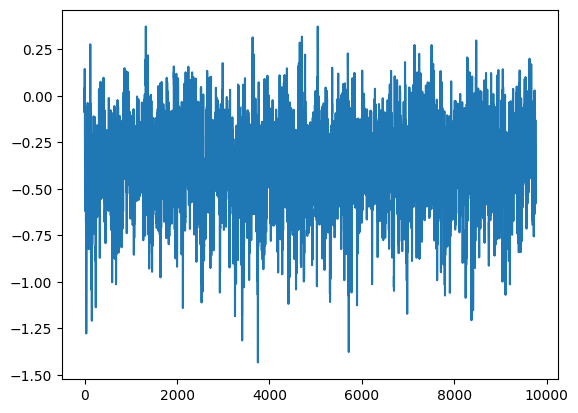

Epoch 10: Critic error ([79118.17407712637, 464.0909938064544, 166081.79495774073, 35.30436644196554, 40.764554371108204, 16.87680915197622, 21.275055002220462, 74.09217586373563, 107.44091990483747, 21.28780057449443, 2511.866594383393]) Generator err ([-0.07479378581047058, -0.05463360995054245, -0.09021376073360443, -0.07537239789962769, -0.08190407603979111, -0.06197541579604149, -0.07919052243232727, -0.07697806507349014, -0.08141689747571945, -0.07358531653881073, -0.07415499538183212])


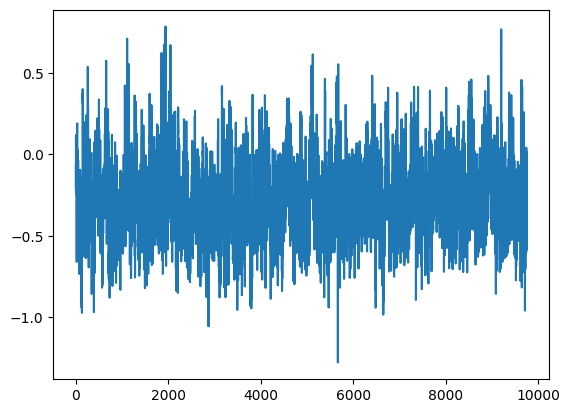

Epoch 20: Critic error ([79118.17407712637, 464.0909938064544, 166081.79495774073, 35.30436644196554, 40.764554371108204, 16.87680915197622, 21.275055002220462, 74.09217586373563, 107.44091990483747, 21.28780057449443, 2511.866594383393, 6.390549008184333, 6839.484557200904, 42.455367102077865, 35.846840438823634, 12.716839015368123, 2435.736247470597, 2730.0984419809647, 104.67853214113178, 22.43500450998308, 2229.2201067997266]) Generator err ([-0.07479378581047058, -0.05463360995054245, -0.09021376073360443, -0.07537239789962769, -0.08190407603979111, -0.06197541579604149, -0.07919052243232727, -0.07697806507349014, -0.08141689747571945, -0.07358531653881073, -0.07415499538183212, -0.07035940140485764, -0.07493336498737335, -0.07249505072832108, -0.07514344155788422, -0.06756170839071274, -0.05975689738988876, -0.06676673889160156, -0.07829612493515015, -0.04841630905866623, -0.08803115040063858])


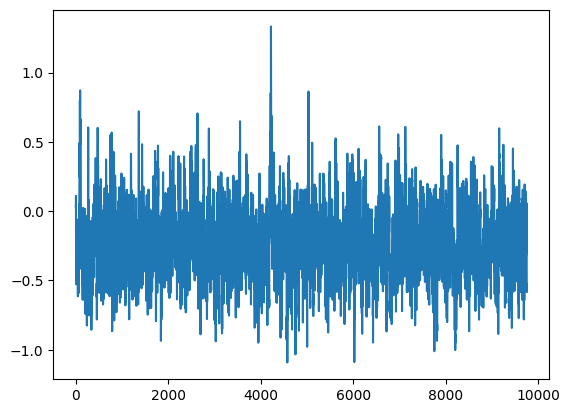

Epoch 30: Critic error ([79118.17407712637, 464.0909938064544, 166081.79495774073, 35.30436644196554, 40.764554371108204, 16.87680915197622, 21.275055002220462, 74.09217586373563, 107.44091990483747, 21.28780057449443, 2511.866594383393, 6.390549008184333, 6839.484557200904, 42.455367102077865, 35.846840438823634, 12.716839015368123, 2435.736247470597, 2730.0984419809647, 104.67853214113178, 22.43500450998308, 2229.2201067997266, 31655.431729270807, 24630.547237761697, 15956.783298292003, 920.4042588578942, 841.7492384902715, 1223.6807985016292, 122.99849357260187, 8247.757697839665, 14848.127625670824, 1461.2727796791398]) Generator err ([-0.07479378581047058, -0.05463360995054245, -0.09021376073360443, -0.07537239789962769, -0.08190407603979111, -0.06197541579604149, -0.07919052243232727, -0.07697806507349014, -0.08141689747571945, -0.07358531653881073, -0.07415499538183212, -0.07035940140485764, -0.07493336498737335, -0.07249505072832108, -0.07514344155788422, -0.06756170839071274, 

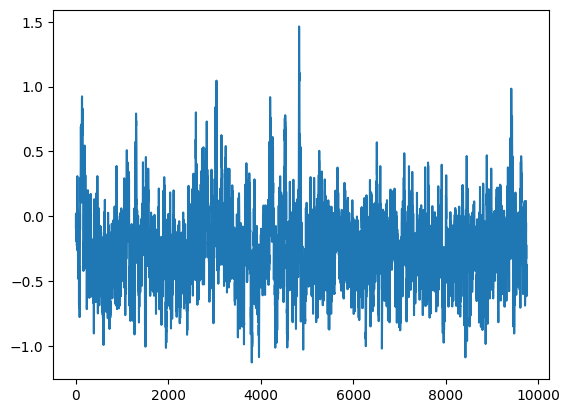

Epoch 40: Critic error ([79118.17407712637, 464.0909938064544, 166081.79495774073, 35.30436644196554, 40.764554371108204, 16.87680915197622, 21.275055002220462, 74.09217586373563, 107.44091990483747, 21.28780057449443, 2511.866594383393, 6.390549008184333, 6839.484557200904, 42.455367102077865, 35.846840438823634, 12.716839015368123, 2435.736247470597, 2730.0984419809647, 104.67853214113178, 22.43500450998308, 2229.2201067997266, 31655.431729270807, 24630.547237761697, 15956.783298292003, 920.4042588578942, 841.7492384902715, 1223.6807985016292, 122.99849357260187, 8247.757697839665, 14848.127625670824, 1461.2727796791398, 283.05002635512466, 485.45672871257227, 3820.908654514931, 585.3517684551442, 2131.82410327251, 2507.291972534424, 582.272735887657, 524.2677335068544, 2083.4616020033677, 1499.131385320743]) Generator err ([-0.07479378581047058, -0.05463360995054245, -0.09021376073360443, -0.07537239789962769, -0.08190407603979111, -0.06197541579604149, -0.07919052243232727, -0.0769

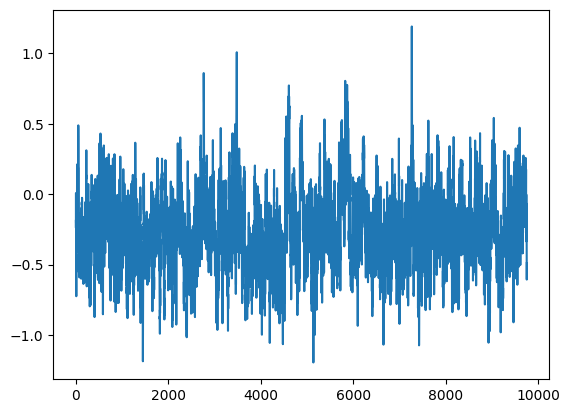